# Kaggle Simpson Classification using Tensorflow

## Import Library

In [1]:
import pathlib
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

## Load Data Set

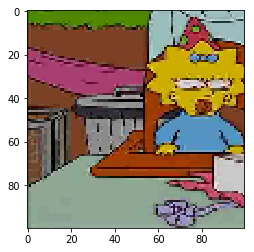

maggie


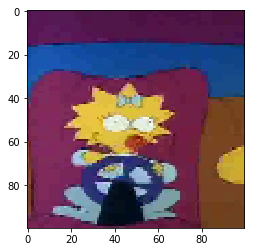

maggie


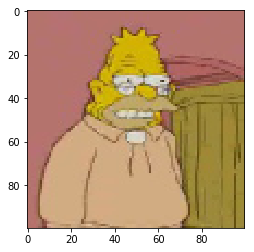

grampa


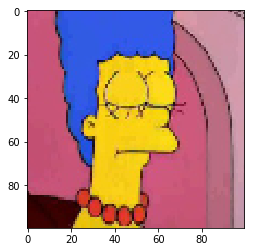

marge
trainset_input shape: (7274, 100, 100, 3)
testset_input size: (248, 100, 100, 3)


In [2]:
root_path = pathlib.Path('.').resolve()
trainset_path = root_path.joinpath('kaggle_simpson_dataset').glob('*simpson*/*.jpg')
testset_path = root_path.joinpath('kaggle_simpson_testset').glob('*simpson*.jpg')

class_name = ['homer', 'lisa', 'bart', 'marge', 'grampa', 'maggie']

trainset_input = []
trainset_target = []
testset_input = []
testset_target = []

def get_label(path):
    for i in range(len(class_name)):
        if class_name[i] in path:
            return i
    else:
        raise TypeError('class name not found:{}'.format(path))
        
def show_img(img):
    plt.imshow(img)
    plt.show()
    
for path in trainset_path:
    pic = Image.open(path)
    pic = pic.resize((100, 100))
    a = np.array(pic)
    trainset_input.append(a)
    trainset_target.append(get_label(str(path)))
    
for path in testset_path:
    pic = Image.open(path)
    pic = pic.resize((100, 100))
    a = np.array(pic)
    testset_input.append(a)
    testset_target.append(get_label(str(path)))
    
show_img(trainset_input[0])
print(class_name[trainset_target[0]])
show_img(trainset_input[30])
print(class_name[trainset_target[30]])
show_img(testset_input[20])
print(class_name[testset_target[20]])
show_img(testset_input[100])
print(class_name[testset_target[100]])

trainset_input = np.asarray(trainset_input)
trainset_target = np.asarray(trainset_target)
testset_input = np.asarray(testset_input)
testset_target = np.asarray(testset_target)

print('trainset_input shape:', trainset_input.shape)
print('testset_input size:', testset_input.shape)


## Build Model

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (2, 2), activation='relu', input_shape=(100, 100, 3)))
model.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu'))
model.add(tf.keras.layers.Conv2D(16, (8, 8), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3, 3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 99, 99, 64)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        32800     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 89, 89, 16)        32784     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 13456)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                861248    
_________________________________________________________________
dens

## Train Model

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(trainset_input, trainset_target, epochs=30)

Epoch 1/30
7274/7274 [==============================] - 21s 3ms/sample - loss: 1.5761 - acc: 0.3368
Epoch 2/30
7274/7274 [==============================] - 19s 3ms/sample - loss: 1.2676 - acc: 0.5147
Epoch 3/30
7274/7274 [==============================] - 18s 3ms/sample - loss: 1.0659 - acc: 0.5803
Epoch 4/30
7274/7274 [==============================] - 18s 3ms/sample - loss: 0.9936 - acc: 0.6156
Epoch 5/30
7274/7274 [==============================] - 18s 3ms/sample - loss: 0.8323 - acc: 0.6772
Epoch 6/30
7274/7274 [==============================] - 18s 3ms/sample - loss: 0.7456 - acc: 0.7101
Epoch 7/30
7274/7274 [==============================] - 18s 3ms/sample - loss: 0.6362 - acc: 0.7481
Epoch 8/30
7274/7274 [==============================] - 18s 3ms/sample - loss: 0.5476 - acc: 0.7963
Epoch 9/30
7274/7274 [==============================] - 18s 3ms/sample - loss: 0.4698 - acc: 0.8266
Epoch 10/30
7274/7274 [==============================] - 18s 3ms/sample - loss: 0.3544 - acc: 0.8690

In [5]:
test_loss, test_acc = model.evaluate(testset_input, testset_target)
test_acc

248/248 [==============================] - 0s 2ms/sample - loss: 0.1032 - acc: 0.9758


0.9758065